Biblioteki użyte do zadania

In [ ]:
pip install pandas
pip install matplotlib
pip install scikit-learn

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

1. Wczytanie danych oraz sprawdzenie kompletności danych.

In [107]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [108]:
missing_data = df.isnull().sum()
print(missing_data)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [109]:
completeness = 1 - (missing_data / len(df))
print(completeness)

Channel             1.0
Region              1.0
Fresh               1.0
Milk                1.0
Grocery             1.0
Frozen              1.0
Detergents_Paper    1.0
Delicassen          1.0
dtype: float64


2. Usunięcie kolumny Channel i Region.

In [110]:
df.drop(['Channel', 'Region'], axis=1, inplace=True)
print(df)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


3. Wizualizacja danych surowych.

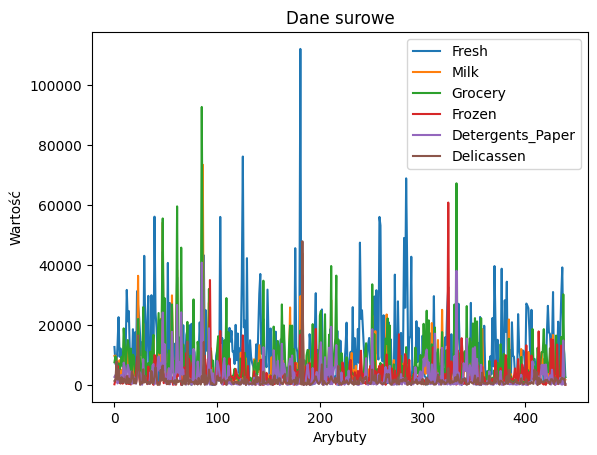

In [111]:
data = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
df = pd.DataFrame(data)

plt.plot(df)

# Nazwy
plt.title("Dane surowe")
plt.xlabel("Arybuty")
plt.ylabel("Wartość")

# Legenda
plt.legend(df.columns)

plt.show()

4. Przeprowadzenie normalizacji w zakresie [0,1] na kolumnach.

In [112]:
# Zakres
new_min = 0
new_max = 1

columns_to_normalize = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in columns_to_normalize:
    x_min = df[column].min()
    x_max = df[column].max()
    df[column] = (df[column] - x_min) / (x_max - x_min) * (new_max - new_min) + new_min

print(df)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1    0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2    0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3    0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4    0.201626  0.072914  0.077552  0.063934          0.043455    0.108093
..        ...       ...       ...       ...               ...         ...
435  0.264829  0.163338  0.172715  0.215469          0.004385    0.045912
436  0.349761  0.018736  0.008202  0.073713          0.002205    0.048874
437  0.129543  0.210136  0.325943  0.006771          0.363463    0.038882
438  0.091727  0.026224  0.024025  0.016649          0.004042    0.044264
439  0.024824  0.022371  0.027022  0.000657          0.011611    0.001022

[440 rows x 6 columns]


In [113]:
df.to_csv('normalized_data.csv', index=False)

In [114]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Przeprowadzenie normalizacji w zakresie [-1,1] na kolumnach.

In [115]:
# Zakres
new_min = -1
new_max = 1

columns_to_normalize = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in columns_to_normalize:
    x_min = df[column].min()
    x_max = df[column].max()
    df[column] = (df[column] - x_min) / (x_max - x_min) * (new_max - new_min) + new_min

print(df)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   -0.774120 -0.738546 -0.837072 -0.993787         -0.869146   -0.944305
1   -0.874202 -0.734352 -0.793807 -0.942903         -0.838820   -0.926033
2   -0.886757 -0.761638 -0.834420 -0.921767         -0.827895   -0.672883
3   -0.763491 -0.968928 -0.909072 -0.790316         -0.975309   -0.925532
4   -0.596747 -0.854173 -0.844897 -0.872132         -0.913090   -0.783813
..        ...       ...       ...       ...               ...         ...
435 -0.470343 -0.673325 -0.654570 -0.569062         -0.991231   -0.908177
436 -0.300478 -0.962529 -0.983595 -0.852574         -0.995591   -0.902253
437 -0.740914 -0.579728 -0.348114 -0.986457         -0.273075   -0.922236
438 -0.816546 -0.947551 -0.951949 -0.966702         -0.991917   -0.911473
439 -0.950351 -0.955258 -0.945956 -0.998685         -0.976778   -0.997956

[440 rows x 6 columns]


In [116]:
df.to_csv('normalized2_data.csv', index=False)

In [117]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,-0.786045,-0.843654,-0.828658,-0.899844,-0.858980,-0.936509
std,0.225547,0.200982,0.204860,0.159578,0.233581,0.117651
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.944275,-0.959751,-0.953652,-0.976423,-0.987569,-0.983093
50%,-0.848397,-0.902727,-0.897550,-0.950661,-0.960146,-0.959846
75%,-0.698064,-0.805693,-0.770358,-0.883990,-0.808005,-0.924186
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


6. Przeprowadzenie standaryzacji danych na kolumnach.

In [118]:
columns_to_standardize = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in columns_to_standardize:
    x_mean = df[column].mean()
    x_std = df[column].std()
    df[column] = (df[column] - x_mean) / x_std

print(df)


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.052873  0.522972 -0.041068 -0.588697         -0.043519   -0.066264
1   -0.390857  0.543839  0.170125 -0.269829          0.086309    0.089050
2   -0.446521  0.408073 -0.028125 -0.137379          0.133080    2.240742
3    0.099998 -0.623310 -0.392530  0.686363         -0.498021    0.093305
4    0.839284 -0.052337 -0.079266  0.173661         -0.231654    1.297870
..        ...       ...       ...       ...               ...         ...
435  1.399719  0.847482  0.849793  2.072862         -0.566186    0.240817
436  2.152842 -0.591469 -0.756304  0.296223         -0.584853    0.291170
437  0.200098  1.313176  2.345716 -0.542762          2.508362    0.121318
438 -0.135230 -0.516947 -0.601829 -0.418964         -0.569122    0.212804
439 -0.728478 -0.555292 -0.572575 -0.619389         -0.504313   -0.522275

[440 rows x 6 columns]


In [119]:
df.to_csv('standardized_data.csv', index=False)

In [120]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.180074e-16,1.614870e-17,6.378736e-16,-1.332268e-16,-8.881784e-17,-4.925353e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.486033e-01,-7.779096e-01,-8.363823e-01,-6.276286e-01,-6.037292e-01,-5.396501e-01
25%,-7.015353e-01,-5.776488e-01,-6.101418e-01,-4.798844e-01,-5.505082e-01,-3.959498e-01
50%,-2.764455e-01,-2.939234e-01,-3.362856e-01,-3.184420e-01,-4.331074e-01,-1.983509e-01
75%,3.900786e-01,1.888771e-01,2.845866e-01,9.935132e-02,2.182338e-01,1.047406e-01
max,7.918724e+00,9.173208e+00,8.926367e+00,1.190545e+01,7.958613e+00,1.645971e+01


7. Wizualizacja normalizacji [0,1], [-1,1] oraz standaryzacji na wybranych kolumnach.

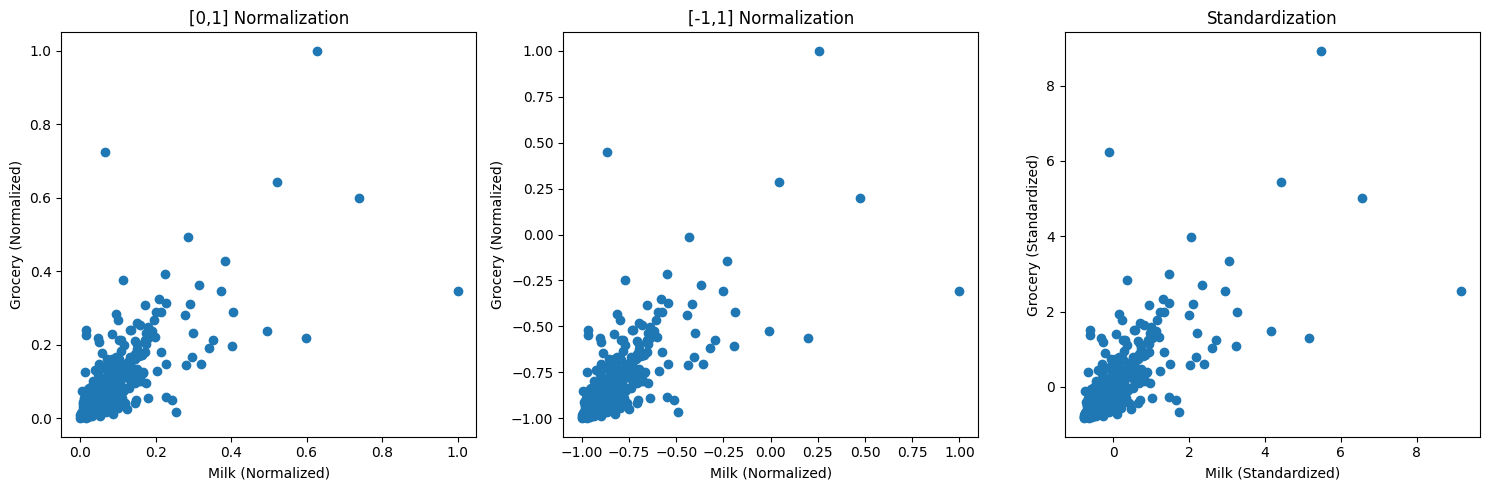

In [121]:
df = pd.DataFrame(data)

plt.figure(figsize=(15, 5))

# [0,1] normalizacja
plt.subplot(131)
plt.scatter(normalized_01['Milk'], normalized_01['Grocery'])
plt.title('[0,1] Normalization')
plt.xlabel('Milk (Normalized)')
plt.ylabel('Grocery (Normalized)')

# [-1,1] normalizacja
plt.subplot(132)
plt.scatter(normalized_minus1_1['Milk'], normalized_minus1_1['Grocery'])
plt.title('[-1,1] Normalization')
plt.xlabel('Milk (Normalized)')
plt.ylabel('Grocery (Normalized)')

# standaryzacja
plt.subplot(133)
plt.scatter(standardized['Milk'], standardized['Grocery'])
plt.title('Standardization')
plt.xlabel('Milk (Standardized)')
plt.ylabel('Grocery (Standardized)')

plt.tight_layout()
plt.show()
